<a href="https://colab.research.google.com/github/Odima-dev/Data-Science-and-Machine-Learning/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier as SklearnTree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Problem 1: Function for finding impureness

def gini(y):
    classes, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return 1 - np.sum(probs ** 2)

# Examples for this function
print("Gini([15, 15]) =", 1 - (0.5**2 + 0.5**2))  # 0.5
print("Gini([15, 15, 15]) =", 1 - (1/3)**2 * 3)  # 0.667
print("Gini([18, 12]) =", 1 - (0.6**2 + 0.4**2))  # 0.48
print("\n")

# Problem 2: Function for finding information gain

def information_gain(y_parent, y_left, y_right):
    parent_gini = gini(y_parent)
    n = len(y_parent)
    n_left = len(y_left)
    n_right = len(y_right)
    weighted_gini = (n_left/n) * gini(y_left) + (n_right/n) * gini(y_right)
    return parent_gini - weighted_gini

# Example using Left [10, 30], Right [20, 5]
y_parent = np.array([0]*30 + [1]*35)
y_left = np.array([0]*10 + [1]*30)
y_right = np.array([0]*20 + [1]*5)
print("Information gain example:", information_gain(y_parent, y_left, y_right))  # ~0.143
print("\n")

# Problem 3: Learning

class ScratchDecisionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.threshold = None
        self.feature_index = None
        self.left_class = None
        self.right_class = None

    def fit(self, X, y):
        """
        Learn the decision tree classifier

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        best_ig = -1
        n_samples, n_features = X.shape
        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left = y[X[:, feature_index] <= threshold]
                right = y[X[:, feature_index] > threshold]
                if len(left) == 0 or len(right) == 0:
                    continue
                ig = information_gain(y, left, right)
                if ig > best_ig:
                    best_ig = ig
                    self.threshold = threshold
                    self.feature_index = feature_index
                    # leaf classes by majority vote
                    self.left_class = np.bincount(left.astype(int)).argmax()
                    self.right_class = np.bincount(right.astype(int)).argmax()
        if self.verbose:
            print(f"Feature: {self.feature_index}, Threshold: {self.threshold}, IG: {best_ig}")

    # Problem 4: Estimate
    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        y_pred = []
        for x in X:
            if x[self.feature_index] <= self.threshold:
                y_pred.append(self.left_class)
            else:
                y_pred.append(self.right_class)
        return np.array(y_pred)

Gini([15, 15]) = 0.5
Gini([15, 15, 15]) = 0.6666666666666667
Gini([18, 12]) = 0.48


Information gain example: 0.14319526627218937




In [13]:
# Problem 5: Learning and estimation
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

# Loading & prepare binary target from introduction to machine learning scratch
def scratch_train_test_split(X, y, train_size=0.8, random_state=0):
    np.random.seed(random_state)
    y = y.reshape(-1, 1)
    Xy = np.concatenate([X, y], axis=1)
    SIZE = len(Xy)
    pick = int(np.round(SIZE * train_size))
    train_pick = np.random.choice(np.arange(SIZE), pick, replace=False)
    test_pick = np.delete(np.arange(SIZE), train_pick)
    train = Xy[train_pick, :]
    test = Xy[test_pick, :]
    X_train = train[:, 0:(Xy.shape[1] - y.shape[1])].reshape(-1, X.shape[1])
    y_train = train[:, -y.shape[1]].reshape(-1,)
    X_test = test[:, 0:(Xy.shape[1] - y.shape[1])].reshape(-1, X.shape[1])
    y_test = test[:, -y.shape[1]].reshape(-1,)
    return X_train, X_test, y_train, y_test

iris = load_iris()
X = iris.data[iris.target != 0]
y = iris.target[iris.target != 0]

# Splitting using scratch_train_test_split
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.8, random_state=0)

# Fitting Scratch Tree
scratch_tree = ScratchDecisionTreeClassifierDepth1(verbose=True)
scratch_tree.fit(X_train, y_train)
y_pred_scratch = scratch_tree.predict(X_test)

# Fitting sklearn Tree (depth 1)
sk_tree = DecisionTreeClassifier(max_depth=1, random_state=0)
sk_tree.fit(X_train, y_train)
y_pred_sk = sk_tree.predict(X_test)

# Evaluating using sklearn metrics
print("\n[Scratch Tree Results]")
print("Accuracy :", accuracy_score(y_test, y_pred_scratch))
print("Precision:", precision_score(y_test, y_pred_scratch, average='binary', pos_label=2))
print("Recall   :", recall_score(y_test, y_pred_scratch, average='binary', pos_label=2))

print("\n[sklearn Tree Results]")
print("Accuracy :", accuracy_score(y_test, y_pred_sk))
print("Precision:", precision_score(y_test, y_pred_sk, average='binary', pos_label=2))
print("Recall   :", recall_score(y_test, y_pred_sk, average='binary', pos_label=2))

Feature: 3, Threshold: 1.7, IG: 0.384978001257071

[Scratch Tree Results]
Accuracy : 0.95
Precision: 1.0
Recall   : 0.9

[sklearn Tree Results]
Accuracy : 0.95
Precision: 1.0
Recall   : 0.9


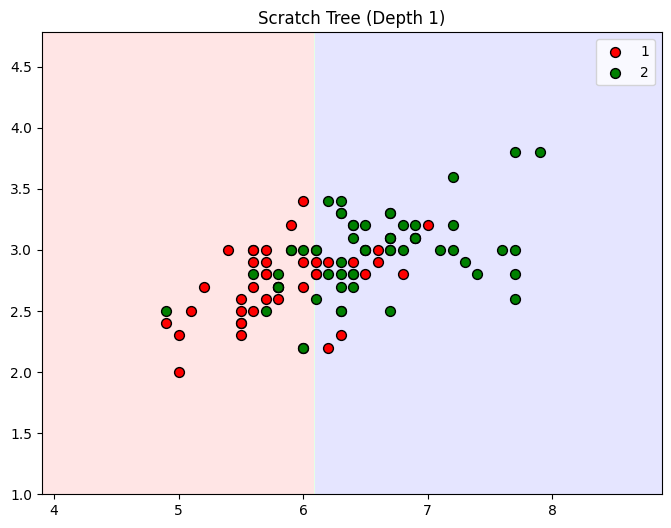

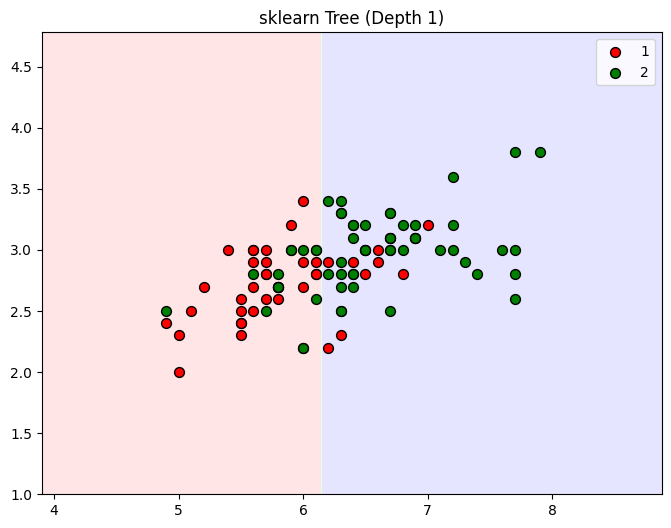

In [14]:
# Problem 6: Visualization of decision area
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold  = ['red', 'green', 'blue']

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    if hasattr(clf, "predict"):
        Z = clf.predict(grid)
    else:
        Z = np.array([clf(x) for x in grid])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    for idx, cls in enumerate(np.unique(y)):
        plt.scatter(X[y==cls, 0], X[y==cls, 1], label=cls, edgecolor='k', s=50, color=cmap_bold[idx])
    plt.title(title)
    plt.legend()
    plt.show()

# Using only first 2 features for 2D plot
iris = load_iris()
X = iris.data[iris.target != 0][:, :2]
y = iris.target[iris.target != 0]

X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.8, random_state=0)

# Scratch depth 1
scratch_tree = ScratchDecisionTreeClassifierDepth1()
scratch_tree.fit(X_train, y_train)
plot_decision_boundary(scratch_tree, X, y, "Scratch Tree (Depth 1)")

# sklearn depth 1
sk_tree = DecisionTreeClassifier(max_depth=1, random_state=0)
sk_tree.fit(X_train, y_train)
plot_decision_boundary(sk_tree, X, y, "sklearn Tree (Depth 1)")

Tree built with depth 2


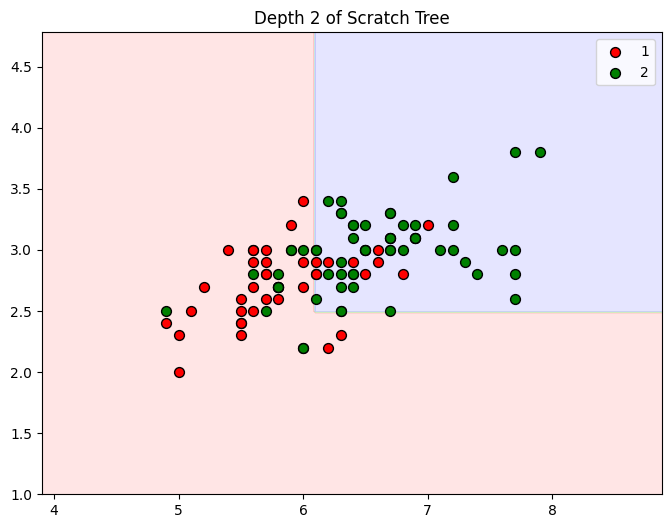

In [16]:
# Problem 7: (Advance assignment) Creation of a decision tree classifier class with a depth of 2
class ScratchDecisionTreeClassifierDepth2():
    def __init__(self, verbose=False):
        self.verbose = verbose
        self.root = None

    class Node:
        def __init__(self, depth=0):
            self.depth = depth
            self.feature_index = None
            self.threshold = None
            self.left = None
            self.right = None
            self.label = None

    def build(self, X, y, depth):
        node = self.Node(depth)
        if depth == 2 or gini(y) == 0:
            node.label = np.bincount(y.astype(int)).argmax()
            return node

        best_ig = -1
        n_samples, n_features = X.shape
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for t in thresholds:
                left_idx = X[:, feature] <= t
                right_idx = X[:, feature] > t
                if left_idx.sum() == 0 or right_idx.sum() == 0:
                    continue
                ig = information_gain(y, y[left_idx], y[right_idx])
                if ig > best_ig:
                    best_ig = ig
                    node.feature_index = feature
                    node.threshold = t
                    best_left_idx = left_idx
                    best_right_idx = right_idx

        if best_ig == -1:
            node.label = np.bincount(y.astype(int)).argmax()
            return node

        node.left = self.build(X[best_left_idx], y[best_left_idx], depth + 1)
        node.right = self.build(X[best_right_idx], y[best_right_idx], depth + 1)
        return node

    def fit(self, X, y):
        self.root = self.build(X, y, depth=0)
        if self.verbose:
            print("Tree built with depth 2")

    def predict_one(self, x, node):
        if node.label is not None:
            return node.label
        if x[node.feature_index] <= node.threshold:
            return self.predict_one(x, node.left)
        else:
            return self.predict_one(x, node.right)

    def predict(self, X):
        return np.array([self.predict_one(x, self.root) for x in X])

# Testing Depth 2
depth2_tree = ScratchDecisionTreeClassifierDepth2(verbose=True)
depth2_tree.fit(X_train, y_train)
plot_decision_boundary(depth2_tree, X, y, "Depth 2 of Scratch Tree")

Tree built with depth ∞


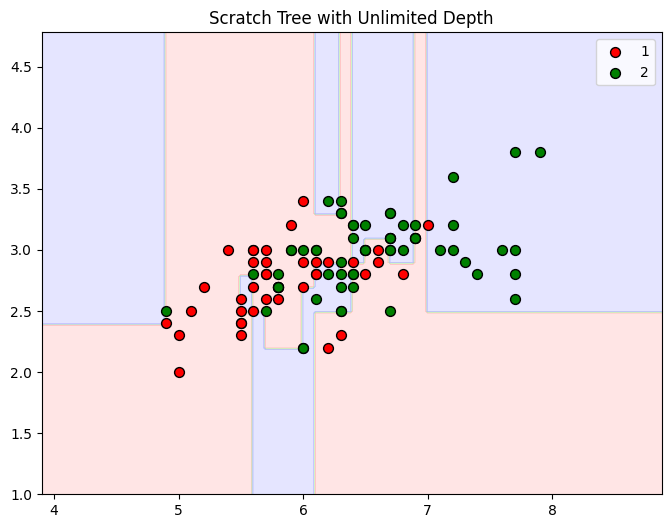

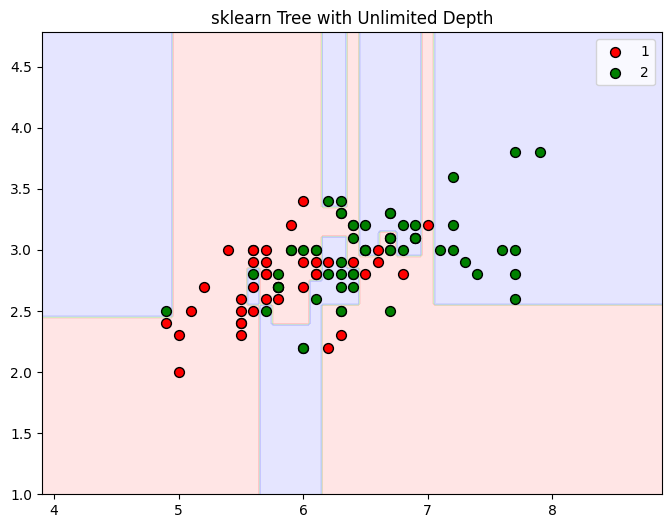

In [18]:
# Problem 8: (Advance assignment) Creation of decision tree classifier class with unlimited depth
class ScratchDecisionTreeClassifierDepthInf():
    def __init__(self, max_depth=None, verbose=False):
        self.verbose = verbose
        self.max_depth = max_depth
        self.root = None

    class Node:
        def __init__(self, depth=0):
            self.depth = depth
            self.feature_index = None
            self.threshold = None
            self.left = None
            self.right = None
            self.label = None

    def build(self, X, y, depth):
        node = self.Node(depth)
        if gini(y) == 0 or (self.max_depth is not None and depth >= self.max_depth):
            node.label = np.bincount(y.astype(int)).argmax()
            return node

        best_ig = -1
        n_samples, n_features = X.shape
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for t in thresholds:
                left_idx = X[:, feature] <= t
                right_idx = X[:, feature] > t
                if left_idx.sum() == 0 or right_idx.sum() == 0:
                    continue
                ig = information_gain(y, y[left_idx], y[right_idx])
                if ig > best_ig:
                    best_ig = ig
                    node.feature_index = feature
                    node.threshold = t
                    best_left_idx = left_idx
                    best_right_idx = right_idx

        if best_ig == -1:
            node.label = np.bincount(y.astype(int)).argmax()
            return node

        node.left = self.build(X[best_left_idx], y[best_left_idx], depth + 1)
        node.right = self.build(X[best_right_idx], y[best_right_idx], depth + 1)
        return node

    def fit(self, X, y):
        self.root = self.build(X, y, depth=0)
        if self.verbose:
            print(f"Tree built with depth {self.max_depth if self.max_depth else '∞'}")

    def predict_one(self, x, node):
        if node.label is not None:
            return node.label
        if x[node.feature_index] <= node.threshold:
            return self.predict_one(x, node.left)
        else:
            return self.predict_one(x, node.right)

    def predict(self, X):
        return np.array([self.predict_one(x, self.root) for x in X])

# Testing infinite depth
depth_inf_tree = ScratchDecisionTreeClassifierDepthInf(verbose=True)
depth_inf_tree.fit(X_train, y_train)
plot_decision_boundary(depth_inf_tree, X, y, "Scratch Tree with Unlimited Depth")

# Comparing to sklearn full tree
sk_tree_full = DecisionTreeClassifier(random_state=0)
sk_tree_full.fit(X_train, y_train)
plot_decision_boundary(sk_tree_full, X, y, "sklearn Tree with Unlimited Depth")